In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pImpactR as impact
from copy import deepcopy as copy
from scipy.signal import hilbert

In [2]:
EmitStr = ['7','14','28']
tunex = 0.59653003
maxTurn = 10
_x = 0
_xSTR = 'X'
n_particles = 32000
q_max = 20.0
nu_max = 2.0
dw_dI = -2*np.pi*0.15560379

In [3]:
Me = impact.util.Me
ke = 100*1.0e6
energy = ke+Me
freq = 30*1.0e6
offset = 0.001

g = energy/Me
bg = np.sqrt(g**2-1.0)

Emit  = [float(emit)*1.0e-9 for emit in EmitStr]
EmitN = [float(emit)*bg*1.0e-9 for emit in EmitStr]

In [4]:
NL_t = 0.4
NL_c = 0.01
NL_L = 1.8
NL_mu = 0.3
alfx = np.tan(np.pi*NL_mu)
betx = NL_L/np.sin(2.0*np.pi*NL_mu)

In [5]:
X=[]
nMax=[]
i=0
for i in range(len(EmitStr)):
    nMax.append(int(maxTurn/np.sqrt(EmitN[i])))
    X.append(np.real(np.load(_xSTR+'.ent.emit'+EmitStr[i]+'nm.npy'))[:nMax[i]])
    i=i+1

# Find maxoffset position

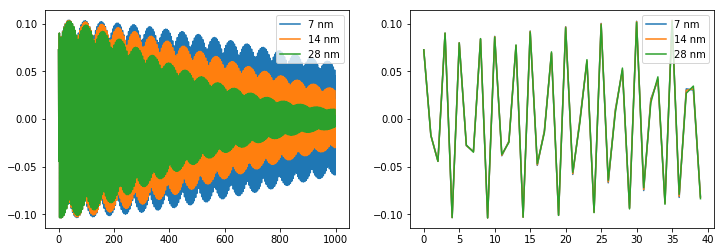

In [6]:
legend = [emit + ' nm' for emit in EmitStr]
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
for i in range(len(Emit)):
    plt.plot(X[i][:1000])
plt.legend(legend)
plt.subplot(1,2,2)
for i in range(len(Emit)):
    plt.plot(X[i][:40])
plt.legend(legend)

In [7]:
for i in range(len(Emit)):
    iMin=np.argmin(X[i][:100])
    print(iMin)

9
9
9


In [8]:
N=[]
for i in range(len(Emit)):
    X[i] = X[i][iMin:]
    X[i] = X[i]/X[i][0]
    N.append(np.arange(len(X[i]))*np.sqrt(EmitN[i]))

1.0000000000000002
1.0000000000000002


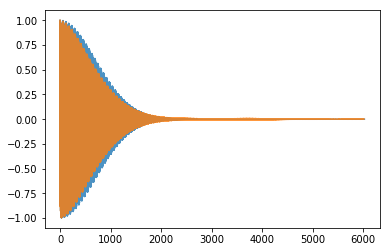

In [9]:
def GaussDist(x):
    return np.exp(-x**2/2.0)/np.sqrt(2.0*np.pi)
Q = np.linspace(-q_max,q_max,1000)
histData = GaussDist(Q)
dq = Q[1]-Q[0]
# check
print(np.sum(histData*dq))
print(np.sum(Q*Q*histData*dq))


def DFT(x,k):
    T = np.arange(len(x))
    return np.sum(x*np.exp(-1j*k*T))

emit0 = 14.0e-9/(NL_c**2)
T = int(maxTurn/(np.sqrt(emit0*NL_c**2*bg)))
centData = np.zeros(T,dtype=np.complex)
xN = offset/betx**0.5/NL_c
pN = alfx*offset/betx**0.5/NL_c
offsetN = (xN**2+pN**2)**0.5
for t in range(T):
    centData[t] = np.sum(histData*np.exp(-1j*t*emit0**0.5*Q*offsetN*dw_dI)*dq)*np.exp(-2j*np.pi*t*tunex)
centData = np.real(centData)

T = np.arange(len(centData))*np.sqrt(emit0*NL_c**2*bg)
plt.plot(centData,alpha=0.8)
plt.plot(X[1],alpha=0.8)

In [10]:
int(maxTurn/(np.sqrt(emit0*NL_c**2*bg)))

6026

In [11]:
len(X[1])

6017

In [12]:
fftX = []
Tune = []
for i in range(len(EmitStr)):
    fftX.append(np.fft.fft(X[i]))
    Tune.append(np.linspace(0,1-1.0/len(X[i]),len(X[i])))

# Raw Data

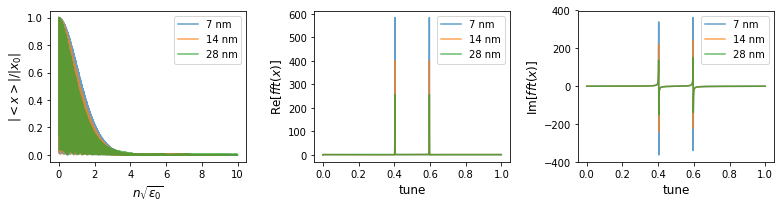

In [13]:
plt.figure(figsize=(11,3))
plt.subplot(1,3,1)
for i in range(len(Emit)):
    plt.plot(N[i],np.abs(X[i])/np.abs(X[i][0]),alpha=0.7)
plt.xlabel(r'$n\sqrt{\epsilon_0}$',fontsize=12);
plt.ylabel(r'$|< x >| / |x_0|$',fontsize=12);
plt.legend(legend)

plt.subplot(1,3,2)
for i in range(len(EmitStr)):
    plt.plot(Tune[i],np.real(fftX[i]),alpha=0.7)
plt.xlabel('tune',fontsize=12);
plt.ylabel(r'Re$\left[fft\left( x \right)\right]$',fontsize=12);
plt.legend(legend)

plt.subplot(1,3,3)
for i in range(len(EmitStr)):
    plt.plot(Tune[i],np.imag(fftX[i]),alpha=0.7)
plt.xlabel('tune',fontsize=12);
plt.ylabel(r'Im$\left[fft\left( x \right)\right]$',fontsize=12);
plt.legend(legend)

plt.tight_layout()
plt.savefig('Centroid.fft.ent.png',dpi=180,bbox_inches = "tight")

# dft zoom

In [14]:
nSample = 1024
Tune= []
Amp = []
Nu = np.linspace(-nu_max,nu_max,nSample)
for i in range(len(Emit)):
    Tune.append(tunex + Nu*np.sqrt(Emit[i]/(NL_c**2))*offsetN*dw_dI)
    Amp.append(np.zeros(nSample,dtype=np.complex128))
    n=len(X[i])
    for k in range(nSample):
        Amp[i][k] = np.sum(X[i]*np.exp(-1j*2.0*np.pi*Tune[i][k]*np.arange(0,n)))
    Amp[i] = Amp[i]*np.sqrt(float(Emit[i])/(NL_c**2))

pData = impact.readParticleData(-111114,ke,Me,freq)
# pData[:,_x+1] = pDataInit[:,_x]*alfx/np.sqrt(betx)/NL_c + pDataInit[:,_x+1]*np.sqrt(betx)/NL_c
# pData[:,_x  ] = pDataInit[:,_x]/np.sqrt(betx)/NL_c

In [15]:
Q = Q/6.0
histData = -histData*np.pi/(offsetN*dw_dI)/2.0

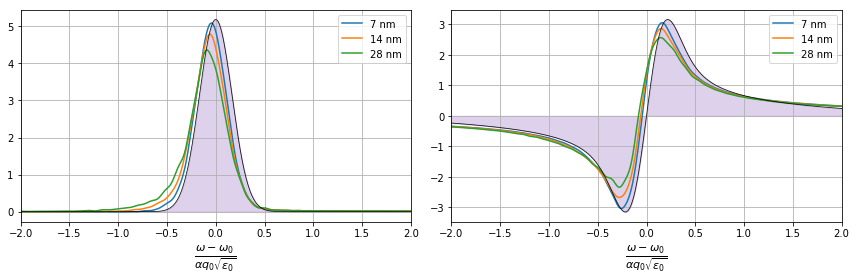

In [16]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
for i in range(len(Emit)):
    plt.plot(Nu,np.real(Amp[i]))
plt.plot(Q,histData,color='k',alpha=0.9,linewidth=0.8)
plt.fill_between(Q, 0, histData,color='C4',alpha=0.3)
plt.xlim(-nu_max,nu_max)
plt.xlabel(r'$\frac{\omega-\omega_0}{\alpha q_0 \sqrt{\epsilon_0}}$',fontsize=16);
plt.legend(legend)
plt.grid()

hilbertData = np.imag(hilbert(histData))
plt.subplot(1,2,2)
for i in range(len(Emit)):
    plt.plot(Nu,np.imag(Amp[i]))
plt.plot(Q,hilbertData,color='k',alpha=0.9,linewidth=0.8)
plt.fill_between(Q, 0, hilbertData,color='C4',alpha=0.3)
plt.xlabel(r'$\frac{\omega-\omega_0}{\alpha q_0 \sqrt{\epsilon_0}}$',fontsize=16);
plt.xlim(-nu_max,nu_max)
plt.legend(legend)
plt.grid()
plt.tight_layout()
plt.savefig('dft.ent.v0.png',dpi=180,bbox_inches = "tight")

In [17]:
from scipy import stats
def poincare(X,Y, samplePeriod=1, xlim=None, ylim=None, xlabel=None, ylabel=None, mksize=10):
    X=X[0::samplePeriod];Y=Y[0::samplePeriod]
    kernel = stats.gaussian_kde([X,Y])
    cData = kernel.evaluate([X,Y])
    plt.scatter(X,Y, c=cData, s=mksize, lw = 0)
    if xlim==None:
        xlim = [min(X),max(X)]
    plt.xlim(xlim[0],xlim[1])
    if ylim==None:   
        ylim = [min(Y),max(Y)]
    plt.ylim(ylim[0],ylim[1])
    if xlabel!=None:
        plt.xlabel(xlabel)
    if ylabel!=None:
        plt.ylabel(ylabel)

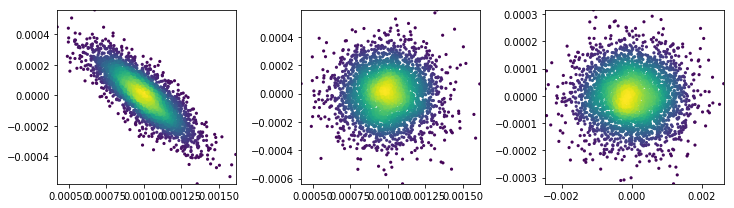

In [18]:
vec = bg/g*impact.data.clight
plt.figure(figsize=[10.3,3])
plt.subplot(1,3,1)
poincare(pData[:,0],pData[:,1],samplePeriod=10)
plt.subplot(1,3,2)
poincare(pData[:,0],pData[:,2],samplePeriod=10)
plt.subplot(1,3,3)
poincare(pData[:,4]/freq*vec/360,pData[:,5]/ke,samplePeriod=10)
plt.tight_layout()